<a href="https://colab.research.google.com/github/syriness/MiniProject_AirlineMachineLearning/blob/main/mini_pj_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 필요 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 데이터 읽어오기
airline = pd.read_csv("https://raw.githubusercontent.com/syriness/MiniProject_AirlineMachineLearning/main/train.csv")


# 데이터 정보 확인
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [3]:
# null값 확인
airline.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [4]:
# 데이터 수에 비해 null값이 작기 때문에 그냥 제거함
airline.dropna(inplace=True) 

In [5]:
# satisfaction 컬럼 인코딩
from sklearn.preprocessing import LabelEncoder

In [6]:
encoder = LabelEncoder() 
encoder.fit(airline["satisfaction"])
airline["satisfaction"] = encoder.transform(airline["satisfaction"])

In [7]:
# 시험셋도 미리 불러오고 인코딩
airline2 = pd.read_csv("https://raw.githubusercontent.com/syriness/MiniProject_AirlineMachineLearning/main/test.csv")

In [8]:
airline2.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [9]:
airline2.dropna(inplace=True)

In [10]:
airline_test = airline2["satisfaction"]
airline_test_X = airline2.iloc[:, 8:24]

In [11]:
encoder2 = LabelEncoder()
encoder2.fit(airline_test)
airline_test = encoder2.transform(airline_test)

In [12]:
airline_test_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25893 entries, 0 to 25975
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Inflight wifi service              25893 non-null  int64  
 1   Departure/Arrival time convenient  25893 non-null  int64  
 2   Ease of Online booking             25893 non-null  int64  
 3   Gate location                      25893 non-null  int64  
 4   Food and drink                     25893 non-null  int64  
 5   Online boarding                    25893 non-null  int64  
 6   Seat comfort                       25893 non-null  int64  
 7   Inflight entertainment             25893 non-null  int64  
 8   On-board service                   25893 non-null  int64  
 9   Leg room service                   25893 non-null  int64  
 10  Baggage handling                   25893 non-null  int64  
 11  Checkin service                    25893 non-null  int

In [13]:
airline_test_X.astype(int)

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44
1,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0
2,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0
3,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6
4,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0
25972,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0
25973,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0
25974,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0


In [14]:
airline_test

array([1, 1, 0, ..., 0, 1, 0])

In [15]:
# 고객 평가지표 데이터프레임
airline_score = airline.iloc[:, 8:24]

In [16]:
# 학습 전 데이터 전처리
airline_score.info()
airline_score.astype(int) # 컬럼 하나가 실수형이라 정수형으로 바꿔줌
airline_score["satisfaction"] = airline["satisfaction"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Inflight wifi service              103594 non-null  int64  
 1   Departure/Arrival time convenient  103594 non-null  int64  
 2   Ease of Online booking             103594 non-null  int64  
 3   Gate location                      103594 non-null  int64  
 4   Food and drink                     103594 non-null  int64  
 5   Online boarding                    103594 non-null  int64  
 6   Seat comfort                       103594 non-null  int64  
 7   Inflight entertainment             103594 non-null  int64  
 8   On-board service                   103594 non-null  int64  
 9   Leg room service                   103594 non-null  int64  
 10  Baggage handling                   103594 non-null  int64  
 11  Checkin service                    1035

In [17]:
# X, y 정의
X = airline_score.drop(["satisfaction"], axis=1)
y = airline_score["satisfaction"]

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Inflight wifi service              103594 non-null  int64  
 1   Departure/Arrival time convenient  103594 non-null  int64  
 2   Ease of Online booking             103594 non-null  int64  
 3   Gate location                      103594 non-null  int64  
 4   Food and drink                     103594 non-null  int64  
 5   Online boarding                    103594 non-null  int64  
 6   Seat comfort                       103594 non-null  int64  
 7   Inflight entertainment             103594 non-null  int64  
 8   On-board service                   103594 non-null  int64  
 9   Leg room service                   103594 non-null  int64  
 10  Baggage handling                   103594 non-null  int64  
 11  Checkin service                    1035

In [19]:
y

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103594, dtype: int64

In [20]:
# 평가지표 함수 정의
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

def evaluation(airline_test, pred):
    acc = accuracy_score(airline_test, pred)
    pre = precision_score(airline_test, pred)
    rec = recall_score(airline_test, pred)
    f1 = f1_score(airline_test, pred)
    roc = roc_auc_score(airline_test, pred)
    cf_matrix = confusion_matrix(airline_test, pred)
    print("정확도: {0:.4f}".format(acc))
    print("정밀도: {0:.4f}".format(pre))
    print("재현율: {0:.4f}".format(rec))
    print("f1 score: {0:.4f}".format(f1))
    print("roc_auc_score: {0:.4f}".format(roc))
    group_names = ['TN','FP','FN','TP']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm')
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier

def rf_tuning(train_set, test_set, parameters):
    model = RandomForestClassifier()
    grid = GridSearchCV(model, parameters, scoring="roc_auc", cv=5, n_jobs=-1, refit = True) # cv=K-fold
    grid.fit(train_set, test_set)
    return grid.best_params_, grid.best_score_

In [22]:
#@title 그리드 서치
from sklearn.model_selection import GridSearchCV

In [23]:
rf_params1 = {
    'max_depth': [5, 7, 10], # 트리의 깊이 (오버피팅) 10
    'n_estimators': [100, 200, 300], # 트리 개수 300
    'min_samples_split':[5, 10, 30], # 노드를 분할하기 위한 최소한의 샘플 데이터 수 10
    "min_samples_leaf":[5, 10, 15] # 말단 노드가 되기 위한 최소한의 샘플 데이터 수 15
}

In [24]:
rf_params2 = {
    'max_depth': [5, 10, 20], 
    'n_estimators': [150, 300, 350], 
    'min_samples_split':[5, 10, 15],
    "min_samples_leaf":[2,3,5]
}

In [25]:
rf_params3 = {
    'max_depth': [10, 12, 15], 
    'n_estimators': [200, 500, 700], 
    'min_samples_split':[10, 20, 30],
    "min_samples_leaf":[2,3,5,7]
}

In [40]:
#@title 결과 : max_depth - 10, n_estimators - 300, min_samples_split - 10, min_samples_leaf- 15
rf_tuning(X, y, rf_params1)

In [27]:
#@title 결과 : max_depth - 20, n_estimators - 350, min_samples_split - 5, min_samples_leaf - 2 
rf_tuning(X, y, rf_params2)

({'max_depth': 20,
  'min_samples_leaf': 2,
  'min_samples_split': 5,
  'n_estimators': 350},
 0.9889456469713409)

In [ ]:
rf_tuning(X, y, rf_params3)

정확도: 0.9411
정밀도: 0.9530
재현율: 0.9108
f1 score: 0.9314
roc_auc_score: 0.9378


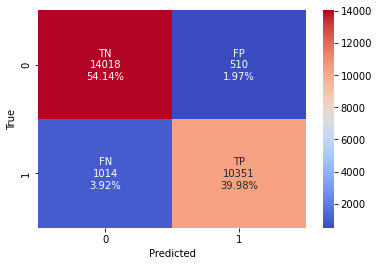

In [28]:
# 조합으로 직접 다 다시하기 
rf = RandomForestClassifier(n_estimators = 350, 
                            max_depth = 15,
                            min_samples_split = 10,
                            min_samples_leaf= 5)

rf.fit(X, y)
pred_rf = rf.predict(airline_test_X)

evaluation(airline_test, pred_rf)

In [29]:
rf.feature_importances_

array([0.20030827, 0.05335318, 0.05055068, 0.0275553 , 0.02420217,
       0.26981521, 0.0528208 , 0.09154179, 0.03924635, 0.07614099,
       0.02698943, 0.0165027 , 0.02323822, 0.03075471, 0.00747686,
       0.00950336])

In [38]:
rf.imp = pd.DataFrame({'satisfaction':X.columns, 'values':rf.feature_importances_})

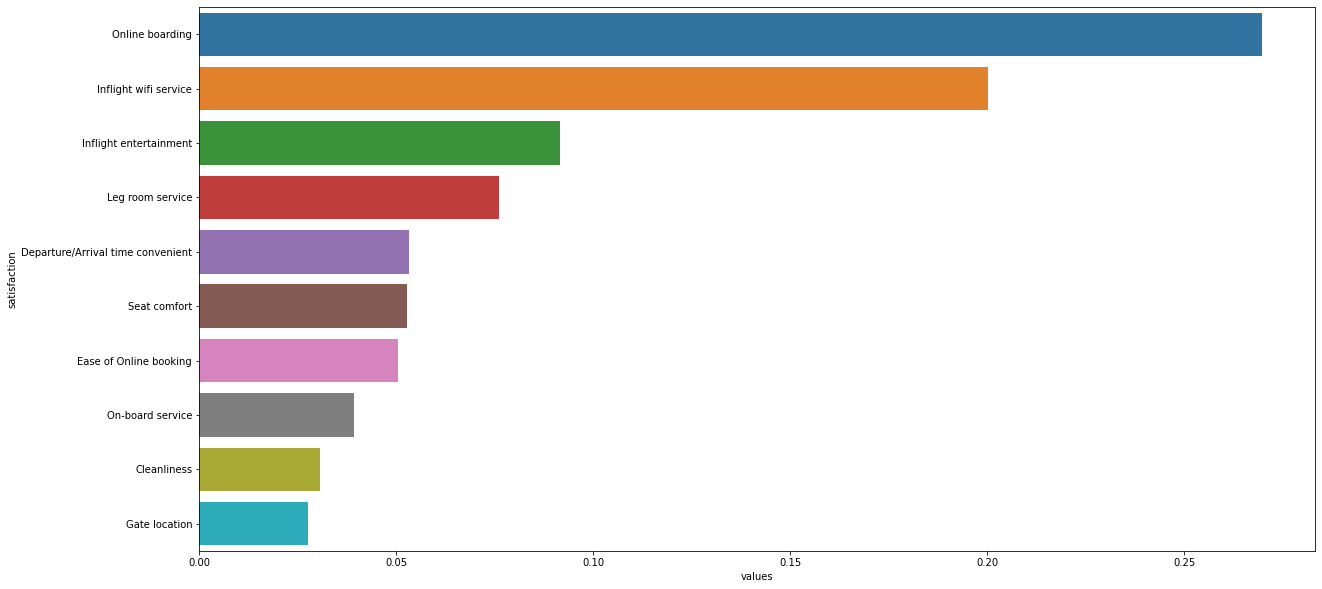

In [39]:
#seaborn으로 시각화
plt.figure(figsize=(20,10))
sns.barplot(x="values", y= "satisfaction",
            data= rf.imp.sort_values(by='values', ascending=False).head(10))